### K-nearest neighbors
One way to know what I'm going to do is by watching what my neighbors are going to do.
You can watch your neighbors among different dimensions like: income, how many kids, age, etc.
This is the idea behind <b>nearest neighbors classification<b>

### The model
Is one of the simplest predictive models there is.
Makes no mathematical assumptions, and it doesnt require any sort of heavy machinery.
Requirements:
- Notion of distance
- Assumption that points that are close to one another are similar

The prediction foe each new point depends only on the handful of points closest to it.

k is the number of neighbors we use to decide which group does the new point belongs to


In [5]:
from typing import List
from collections import Counter

def raw_majority_vote(labels:List[str])-> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

assert raw_majority_vote(["Kev","Nat","Kev","Blue"]) == "Kev"



In [8]:
def majority_votes(labels : List[str]) -> str:
    votes_counts = Counter(labels)
    winner,winner_count = votes_counts.most_common(1)[0]
    num_winners = len([count for count in votes_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_votes(labels[:-1])
assert majority_votes(['a','b','c','b','a']) == 'b'

In [19]:
from typing import NamedTuple
from scratch.linear_algebra import Vector,distance

class LabeledPoint(NamedTuple):
    point:Vector #position
    label:str    #name of the class that belongs

def knn_classify(k:int,
                 labeled_points : List[LabeledPoint],
                 new_point : Vector) -> str:
    by_distance = sorted(labeled_points,key=lambda lp:distance(lp.point,new_point))
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    return majority_votes(k_nearest_labels)


In [20]:
import requests

data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open('iris.dat','w') as f:
    f.write(data.text)

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('iris.dat')

In [23]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','class']

In [60]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [24]:

def obtener_segunda_palabra(cadena):
    return cadena.split('-')[-1]

In [30]:
df['class'] = df['class'].apply(obtener_segunda_palabra)

setosa
versicolor
virginica


In [26]:
import matplotlib.pyplot as plt
import numpy as np

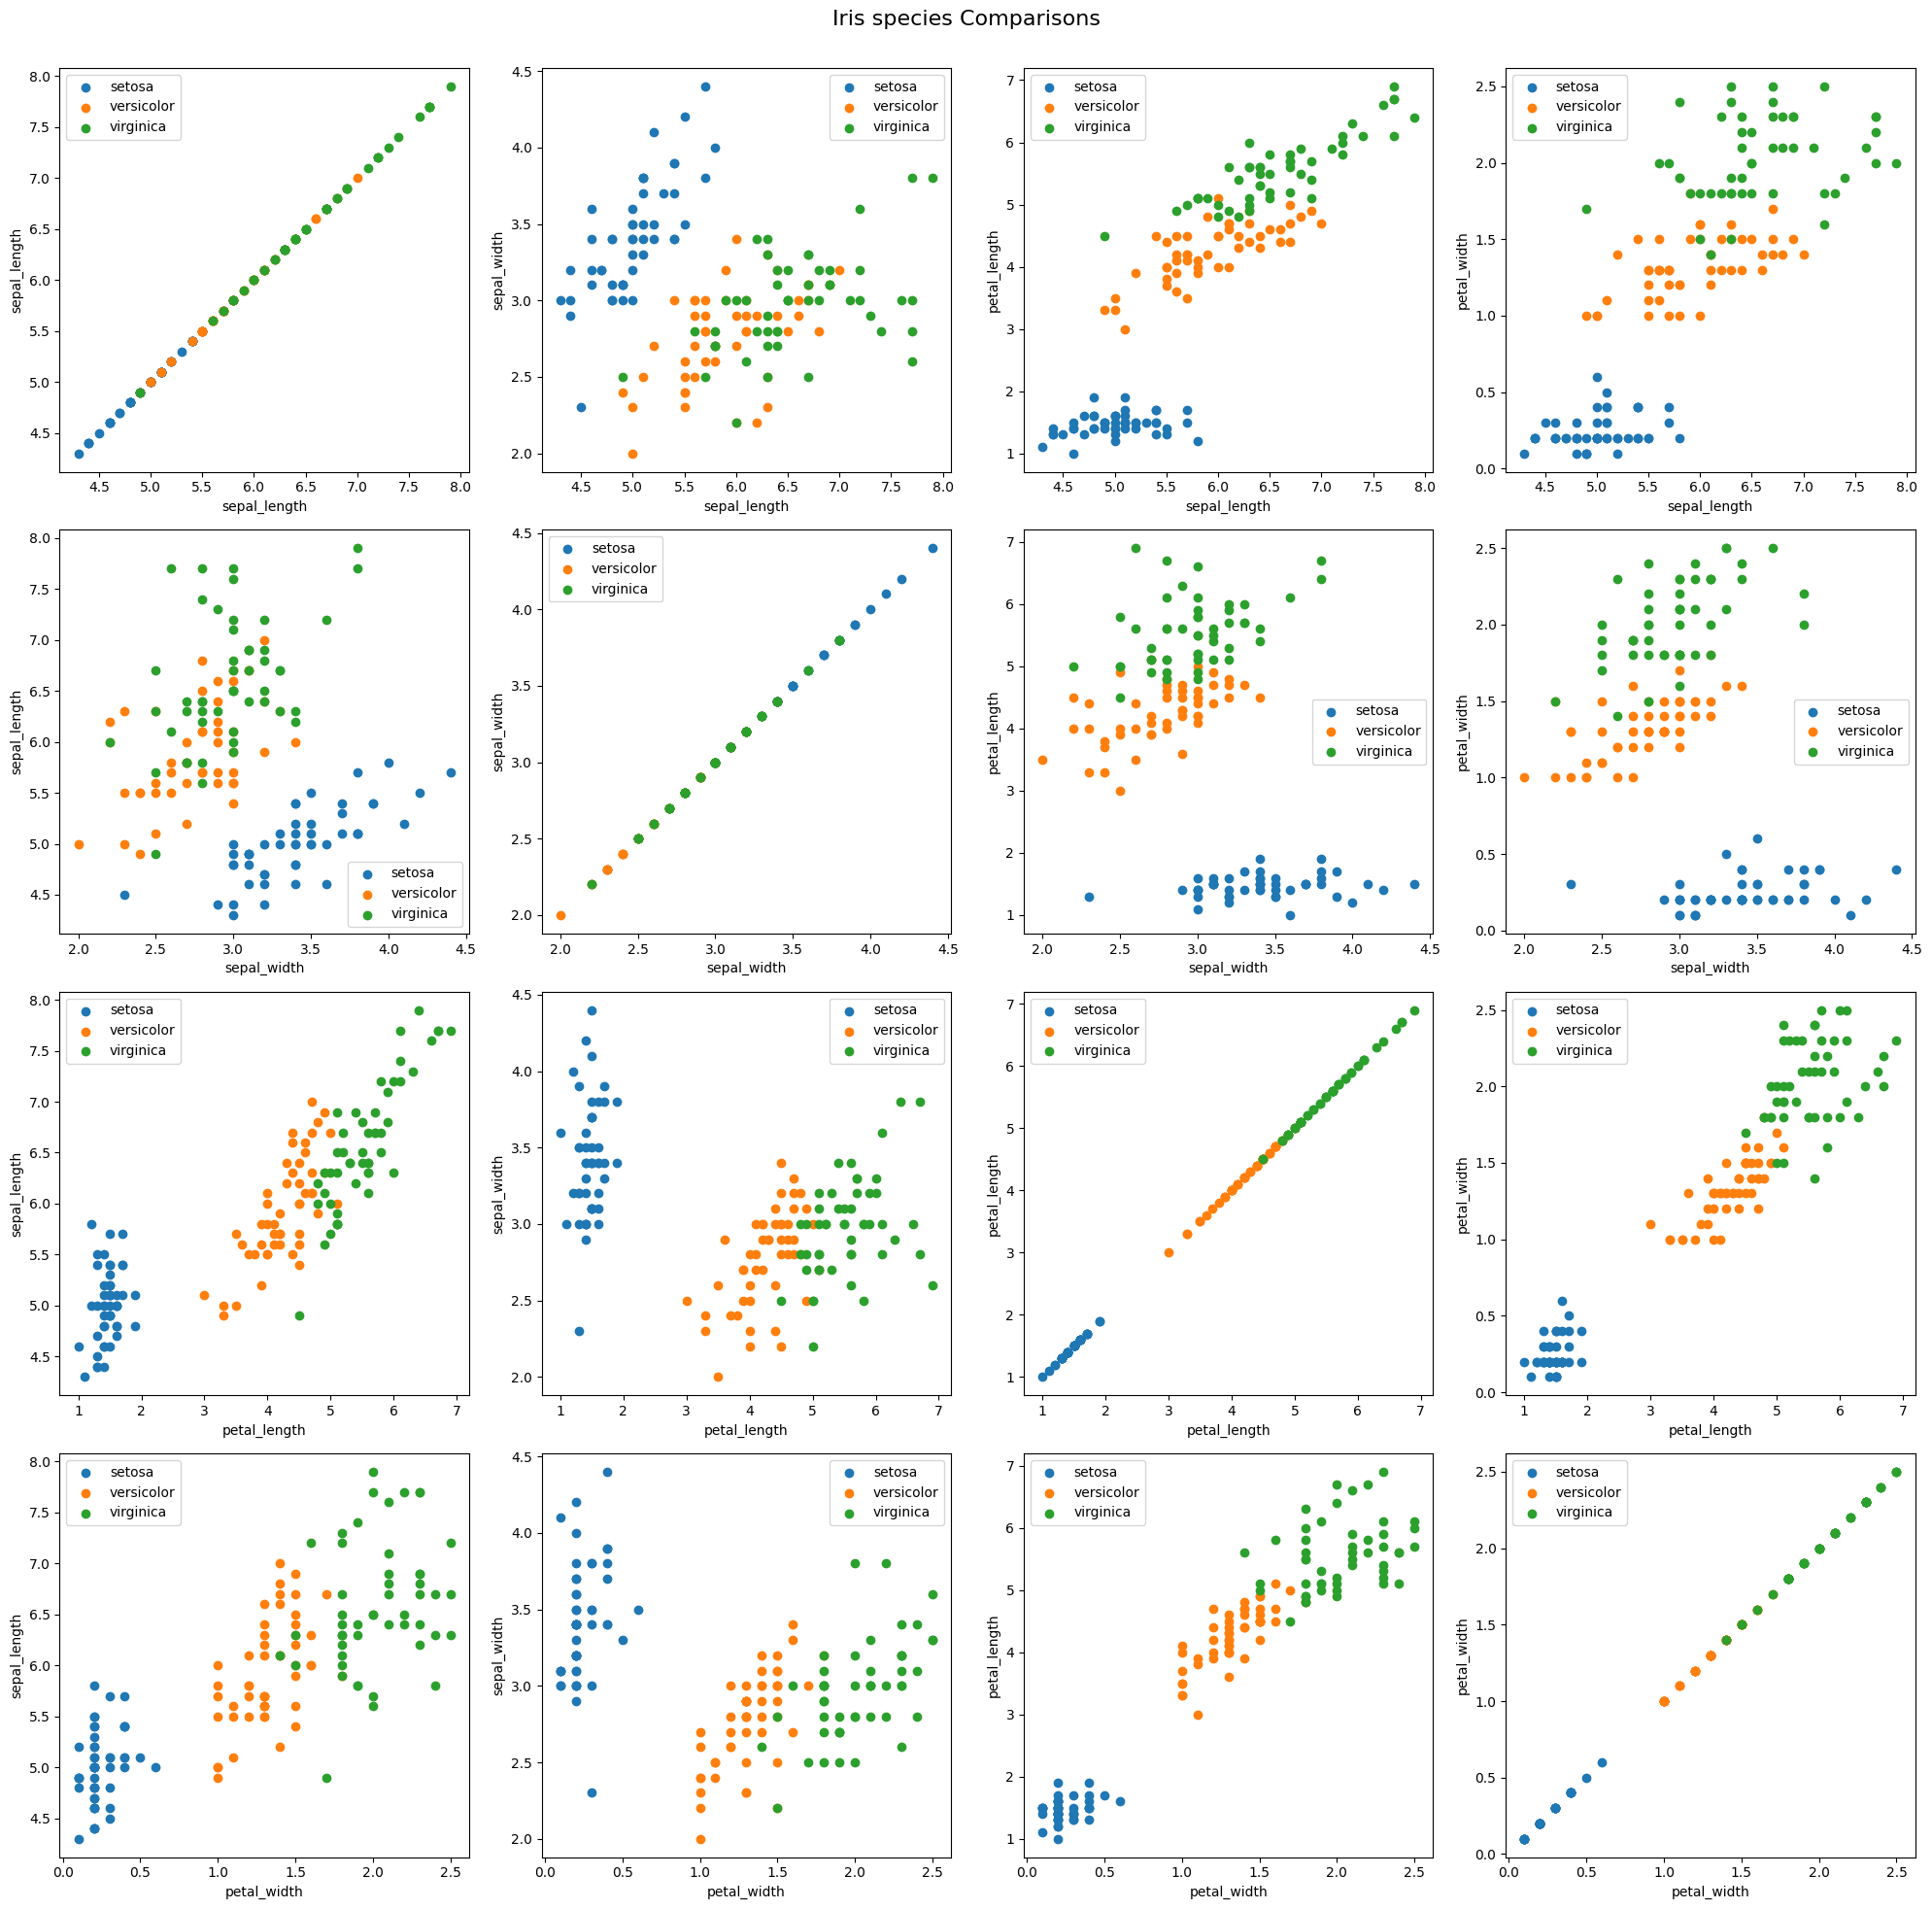

In [45]:
fig,ax = plt.subplots(4,4,figsize=(20,20))
metrics = ['sepal_length','sepal_width','petal_length','petal_width']
for _class,group in df.groupby('class'):
    for i in range(len(metrics)):
        for j in range(len(metrics)):
            ax[i][j].scatter(group[metrics[i]],group[metrics[j]],label=_class)
            ax[i][j].legend() 
            ax[i][j].set_xlabel(metrics[i])
            ax[i][j].set_ylabel(metrics[j])
fig.suptitle("Iris species Comparisons",fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(['class'],axis=1)
y= df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [113]:
K=10
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

### Confusion Matrix
Let's do a confusion matrix to see the metrics of our model

In [114]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train,model.predict(X_train))

In [115]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion matrix')

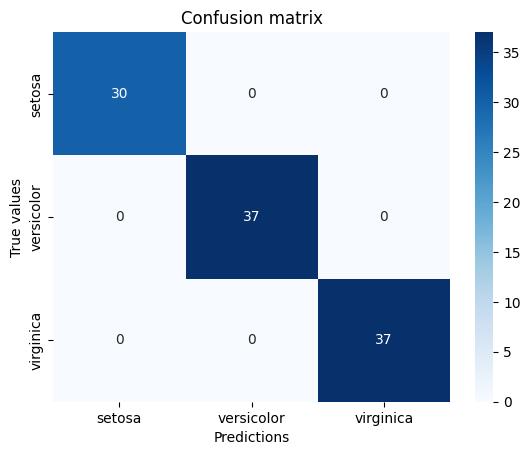

In [116]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Confusion matrix")

### Confusion matrix with matplot

In [105]:
df_class = pd.DataFrame(conf_mat,index=classes,columns=classes)
df_class

,setosa,versicolor,virginica
setosa,30,0,0
versicolor,0,36,1
virginica,0,0,37


C:\Users\bruno\AppData\Local\Temp\ipykernel_11512\884943037.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + classes)
C:\Users\bruno\AppData\Local\Temp\ipykernel_11512\884943037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] +classes,)


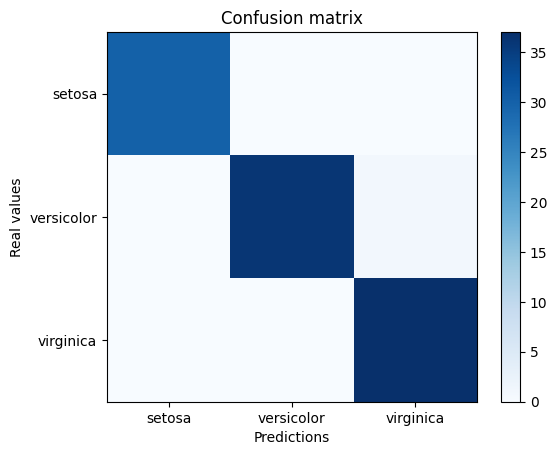

array([[30,  0,  0],
       [ 0, 36,  1],
       [ 0,  0, 37]], dtype=int64)

In [112]:
fix,ax = plt.subplots()
cax = ax.matshow(df_class,cmap="Blues")
classes= ['setosa', 'versicolor', 'virginica']
#classes = list(df['class'].unique())
fig.colorbar(cax) #Agrega la barra de colores lateral derecha
ax.set_title("Confusion matrix")
ax.set_xticklabels([''] + classes)
ax.xaxis.set_ticks_position('bottom')
ax.set_yticklabels([''] +classes,)
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()
conf_mat

,setosa,versicolor,virginica
setosa,30,0,0
versicolor,0,36,1
virginica,0,0,37


c:\Users\bruno\OneDrive\Escritorio\Bruno\OneDrive\Machine learning\mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)